In [7]:
#Add Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [23]:
#combined_data.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [63]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summarystats = pd.DataFrame(combined_data.groupby("Drug Regimen").count())
#First, use groupby to create summary stats by drug regime, then add results into columns in summarystats


summarystats["Mean"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
summarystats["Median"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
summarystats["Variance"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
summarystats["Standard Deviation"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
summarystats["SEM"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())


summarystats = summarystats[["Mouse ID", "Mean", "Median", "Standard Deviation", "Variance", "SEM"]]

#Rename columns
summarystats = summarystats.rename(columns = {"Mean" : "Mean Tumor Volume", "Median" : "Median Tumor Volume", "Variance" : "Tumor Volume Variance", "Standard Deviation" : "Tumor Volume Std. Dev.", "SEM" : "Tumor Volume Std. Err." })

summarystats.head(10)






,Mouse ID,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Std. Dev.,Tumor Volume Variance,Tumor Volume Std. Err.
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,178,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,178,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,188,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,186,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,181,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,161,52.322552,50.854632,6.507770,42.351070,0.512884
Ramicane,228,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,181,54.233149,52.431737,7.710419,59.450562,0.573111


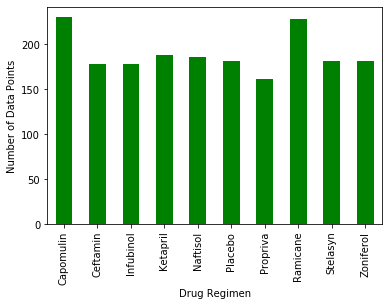

<Figure size 432x288 with 0 Axes>

In [66]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

datapoints = summarystats[["Mouse ID"]]

# Use DataFrame.plot() in order to create a bar chart of the data
datapoints.plot(kind="bar", figsize=(6,4), color = "g", legend=False)

# Set labels for the chart
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

plt.show()
plt.tight_layout()


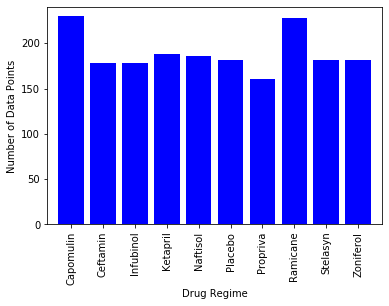

In [69]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# Set x axis and tick locations
x_axis = np.arange(len(datapoints))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(6,4))
plt.bar(x_axis, datapoints["Mouse ID"], color = "b", width = .8)
plt.xticks(tick_locations, datapoints.index.values, rotation="vertical")

# Set x and y limits
plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(datapoints["Mouse ID"])+10)

# Set a Title and labels

plt.xlabel("Drug Regime")
plt.ylabel("Number of Data Points")

# Save our graph and show the grap
plt.show()

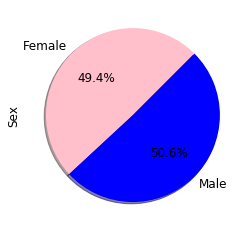

In [108]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


#Create a dataframe grouping by the 'Sex' column
gender = combined_data.groupby('Sex')

# Create a dataframe counting the number of data points for each gender
combined_gender = pd.DataFrame(gender['Sex'].count())

# View the groupby dataframe
#combined_gender.head()

combined_gender.plot(kind='pie',subplots=True, startangle=45,  autopct='%1.1f%%',shadow=True, fontsize=12, colors =["pink","blue"],legend =False)
plt.show()



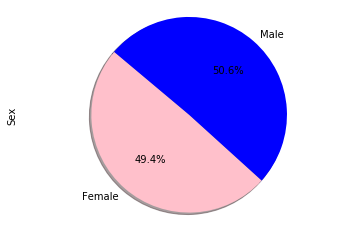

In [107]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Get Labels for our pie chart from the index values of the groupby dataframe
genders = list(combined_gender.index.values)

gender_counts = combined_gender['Sex']

colors = ["pink", "blue"]

# Create the pie chart based upon the values above

plt.pie(gender_counts, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.rcParams['font.size'] = 12

plt.ylabel("Sex")
plt.axis("equal")

plt.show()


##Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens


In [111]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers.


#First create a list of the four drugs to examine
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#Using 'isin()' method to filter the original 'combined_data' data frame with drug_list:

four_drugs = combined_data[combined_data['Drug Regimen'].isin(drug_list)]


four_drugs.head(10)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [ ]:
four_last_tumor = four_drugs.groupby(['Drug Regimen','Mouse ID']).agg(\